In [2]:
#predict score of training data is more than testing data is called overfitting.
#training and testing accuracy being almost equal is bestfitting and if low then underfitting
#common explaantion of the poor performance of a predictive model.
#the curvature working very precisely on training data
#it occurs when the model memorizes the training data not that understanding the feature

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [5]:
dataset.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
input_data = dataset.iloc[:,:-1]
output_data = dataset['Exited']

In [7]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data,test_size=0.2, random_state=10)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns=input_data.columns)

In [32]:
df = pd.DataFrame(input_data)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [12]:
import tensorflow 

In [82]:
from keras.layers import Dense
from keras.regularizers import L2
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [83]:
ann = Sequential()

In [50]:
# to understand input node
input_data.shape

(10000, 8)

In [92]:
ann.add(Dense(6,input_dim = 8, activation='relu',kernel_regularizer=L2(l2=0.01)))#for regularization we can use L1, L2, L1&L2
ann.add(Dense(4, activation='relu',kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(2, activation='relu',kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(1, activation='sigmoid')) #use of sigmoid activation function because our output is in binary format

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
# for batch size
x_train.shape

(8000, 8)

In [95]:
ann.fit(x_train, y_train, batch_size=100, epochs = 50,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7952 - loss: 0.7733 - val_accuracy: 0.7890 - val_loss: 0.7365
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.7221 - val_accuracy: 0.7890 - val_loss: 0.6826
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: 0.6657 - val_accuracy: 0.7890 - val_loss: 0.6205
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7981 - loss: 0.6001 - val_accuracy: 0.7890 - val_loss: 0.5659
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7986 - loss: 0.5494 - val_accuracy: 0.7890 - val_loss: 0.5453
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.5306 - val_accuracy: 0.7890 - val_loss: 0.5381
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.5174 - val_accuracy: 0.7890 - val_loss: 0.5330
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7978 - loss: 0.5206 - val_accuracy: 0.7890 - val_loss:

In [96]:
train_accuracy = ann.history.history['accuracy']
test_accuracy = ann.history.history['val_accuracy']#this is only training accuracy but after validation_data given in model, val_accuracy and val_loss obtained

In [97]:
len(test_accuracy)

36

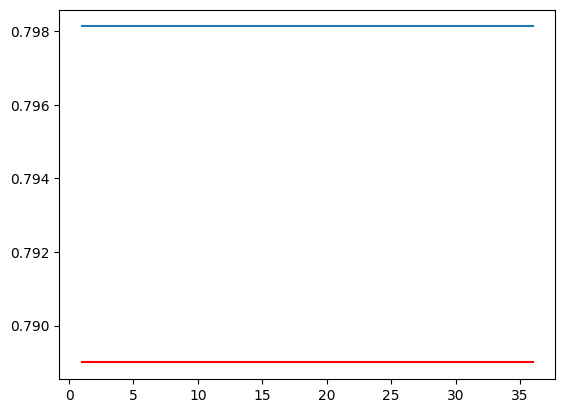

In [98]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,37)], train_accuracy)
plt.plot([i for i in range(1,37)], test_accuracy, c='red')
plt.show() #output shows overfitting

In [75]:
prd = ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [76]:
prd_data = []
for i in prd:
    if i[0] > 0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [77]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
    if i[0] > 0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test, prd_data) * 100

85.1

In [80]:
accuracy_score(y_train, prd_data1) * 100 # the model is overfitting

85.8

In [43]:
# overfitting can be removed by
#cross-validation, train with more data, remove features, early stopping, regularization, ensembling, hyperparameters